In [ ]:
!pip install google-cloud-vision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 444.0/444.0 kB 7.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from google.cloud import vision
from google.protobuf.json_format import MessageToDict, MessageToJson
from pprint import pprint

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

posts_data = pd.read_csv("/content/drive/MyDrive/instagram_posts.csv")
posts_data

,description,media,media_alt,likes,comments
0,When Katy Perry and Orlando Bloom settled on a...,https://instagram.fbom22-1.fna.fbcdn.net/v/t51...,"Photo by Bloomberg Business on September 27, 2...",6562,112
1,As the white-collar world returns to normal af...,https://instagram.fbom22-1.fna.fbcdn.net/v/t51...,"Photo by Bloomberg Business on September 27, 2...",2278,169
2,Like the idea of remote working from overseas?...,https://instagram.fbom22-1.fna.fbcdn.net/v/t51...,"Photo by Bloomberg Business on September 27, 2...",9770,183
3,Mooncake season is in full swing with the fast...,https://instagram.fbom22-1.fna.fbcdn.net/v/t51...,Photo shared by Bloomberg Business on Septembe...,2284,51
4,"EXCLUSIVE: Hui Ka Yan, the billionaire chairma...",https://instagram.fbom22-1.fna.fbcdn.net/v/t51...,"Photo by Bloomberg Business on September 26, 2...",5994,135
...,...,...,...,...,...
6993,The first country to develop a coronavirus vac...,https://instagram.fbom22-1.fna.fbcdn.net/v/t51...,NaN,121715,109
6994,Looking for a way to gauge virus concerns in t...,https://instagram.fbom22-1.fna.fbcdn.net/v/t51...,"Photo by Bloomberg Business on May 27, 2020.",12405,147
6995,Photographer @giles_price captured images of L...,https://instagram.fbom22-1.fna.fbcdn.net/v/t51...,"Photo by Bloomberg Business on May 27, 2020.",7662,69
6996,"For the first time in nearly a decade, America...",https://instagram.fbom22-1.fna.fbcdn.net/v/t51...,NaN,139507,76


In [ ]:
posts_data.isna().sum()

description      0
media            0
media_alt      638
likes            0
comments         0
dtype: int64

In [ ]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/content/drive/MyDrive/google_image_vision_creds.json"

In [ ]:
def get_labels_and_text_from_media(media_url):
  client = vision.ImageAnnotatorClient()

  request = {
      "image": {'source': {'image_uri': media_url}},
      "features": [
          {"type_": vision.Feature.Type.TEXT_DETECTION},
          {"type_": vision.Feature.Type.LABEL_DETECTION},
      ],
  }

  response = client.annotate_image(request)
  res = MessageToDict(response._pb)

  labels = []
  if res.get("labelAnnotations") != None:
    for label in res["labelAnnotations"]:
      labels.append(label["description"])

  text = ""
  if res.get("textAnnotations") != None:
    text = res["textAnnotations"][0]["description"]

  media_desc = dict()
  media_desc["media_text"] = text
  media_desc["media_labels"] = labels

  return media_desc

In [ ]:
media_text = []
media_labels = []

In [ ]:
for index, row in posts_data.iterrows():
  media_desc = get_labels_and_text_from_media(row["media"])
  media_text.append(media_desc["media_text"])
  media_labels.append(media_desc["media_labels"])

  print(index)




In [ ]:
posts_data["media_labels"] = media_labels
posts_data["media_text"] = media_text

In [ ]:
posts_data

,description,media,media_alt,likes,comments,media_labels,media_text
0,When Katy Perry and Orlando Bloom settled on a...,https://instagram.fbom22-1.fna.fbcdn.net/v/t51...,"Photo by Bloomberg Business on September 27, 2...",6562,112,"[Forehead, Lip, Chin, Eyebrow, Shoulder, Eye, ...",Katy Perry is fighting\nthe 1-800-Flowers\nfou...
1,As the white-collar world returns to normal af...,https://instagram.fbom22-1.fna.fbcdn.net/v/t51...,"Photo by Bloomberg Business on September 27, 2...",2278,169,"[Furniture, Building, Table, Interior design, ...",22 PM\nRoom 21/2480 (10)\nthis room to a meeti...
2,Like the idea of remote working from overseas?...,https://instagram.fbom22-1.fna.fbcdn.net/v/t51...,"Photo by Bloomberg Business on September 27, 2...",9770,183,"[Water, Boat, Sky, Nature, Watercraft, Plant, ...",Digital nomad visas\nexpand as Spain\nand Cana...
3,Mooncake season is in full swing with the fast...,https://instagram.fbom22-1.fna.fbcdn.net/v/t51...,Photo shared by Bloomberg Business on Septembe...,2284,51,"[Food, Ingredient, Recipe, Gesture, Baked good...","The best mooncakes\nfor 2023, according to\na ..."
4,"EXCLUSIVE: Hui Ka Yan, the billionaire chairma...",https://instagram.fbom22-1.fna.fbcdn.net/v/t51...,"Photo by Bloomberg Business on September 26, 2...",5994,135,"[Forehead, Chin, Water, Tie, Coat, World, Happ...",China puts Evergrande's\nbillionaire founder u...
...,...,...,...,...,...,...,...
6993,The first country to develop a coronavirus vac...,https://instagram.fbom22-1.fna.fbcdn.net/v/t51...,NaN,121715,109,"[Hypodermic needle, Fluid, Medical equipment, ...",Bloomberg\nCOVID 19\nvaccine\nThe U.S. and Chi...
6994,Looking for a way to gauge virus concerns in t...,https://instagram.fbom22-1.fna.fbcdn.net/v/t51...,"Photo by Bloomberg Business on May 27, 2020.",12405,147,"[Food, Ingredient, Sleeve, Recipe, Table, Tabl...","Wary of Covid-19, Americans are\nstill orderin..."
6995,Photographer @giles_price captured images of L...,https://instagram.fbom22-1.fna.fbcdn.net/v/t51...,"Photo by Bloomberg Business on May 27, 2020.",7662,69,"[Building, Window, Line, Leisure, Aqua, House,...",Thermographic\nimages show\nLondoners going ou...
6996,"For the first time in nearly a decade, America...",https://instagram.fbom22-1.fna.fbcdn.net/v/t51...,NaN,139507,76,"[Cloud, Sky, Aircraft, Vehicle, Rocket, Aviati...",


In [ ]:
(posts_data["description"].iloc[0])

'When Katy Perry and Orlando Bloom settled on a $15 million house in Montecito, they looked set to join an exclusive set of celebrity neighbors in a Californian slice of heaven. Then they found themselves in real-estate hell.Days after signing the contract on the 8-bedroom estate, the seller — 1-800-Flowers founder and former private equity manager, Carl Westcott — backed out of the deal, saying he was on painkillers at the time and not of sound mind. But Katy Perry refused to walk away.The case is about to go to trial, opening a window into a real-estate deal gone wrong in a chic enclave on the edge of Santa Barbara that counts Oprah Winfrey and Brad Pitt as residents. Tap the link in our bio for the background.📷: Angela Weiss/AFP/Getty Images'

In [ ]:
posts_data.to_csv("instagram_posts_data.csv", index=False)

In [ ]:
shuffled_posts_data = posts_data.sample(frac=1).reset_index(drop=True)

shuffled_posts_data

,description,media,media_alt,likes,comments,media_labels,media_text
0,The letters are stamped all over the hallways ...,https://instagram.fbom22-1.fna.fbcdn.net/v/t51...,"Photo by Bloomberg Business on September 19, 2...",8100,215,"[Skyscraper, Building, Sky, Cloud, Daytime, Wo...",The trillion-dollar industry\npowering Chicago...
1,Hitting the federal debt ceiling would be “pot...,https://instagram.fbom22-1.fna.fbcdn.net/v/t51...,NaN,5568,173,"[Forehead, Chin, Sleeve, Dress shirt, Gesture,...",rg\nBloo\nJamie Dimon:\nDebt ceiling could\nbe...
2,There’s a growing body of evidence that “super...,https://instagram.fbom22-1.fna.fbcdn.net/v/t51...,"Photo shared by Bloomberg Business on May 30, ...",17527,328,"[Car, Motor vehicle, Product, Vehicle, Human, ...",One infected person\nloud-talking in a crowd\n...
3,"Yeezy, the sneaker company founded by Kanye We...",https://instagram.fbom22-1.fna.fbcdn.net/v/t51...,"Photo by Bloomberg Business on July 07, 2020.",26352,618,"[Cap, Human, Gesture, Font, Community, Beard, ...",ZRZU\nKanye West's Yeezy\ngot millions from a\...
4,"As MacKenzie and Jeff Bezos, the couple's dona...",https://instagram.fbom22-1.fna.fbcdn.net/v/t51...,NaN,294849,294,"[Font, Poster, Advertising, Event, Graphics, B...",MACKENZIE SC\neeee\n200\nelee\n:000000000; :00...
...,...,...,...,...,...,...,...
6993,Block said it will explore legal action agains...,https://instagram.fbom22-1.fna.fbcdn.net/v/t51...,"Photo by Bloomberg Business on March 23, 2023.",9509,198,"[Forehead, Nose, Beard, Jaw, Ear, Facial hair,...",Jack Dorsey's Block vows to\nfight back after ...
6994,The pandemic dramatically changed property mar...,https://instagram.fbom22-1.fna.fbcdn.net/v/t51...,"Photo by Bloomberg Business on May 07, 2021.",7309,113,"[Product, Font, Urban design, Magenta, Slope, ...",How the pandemic reshaped\nreal estate across ...
6995,The fallout from the implosion of Silicon Vall...,https://instagram.fbom22-1.fna.fbcdn.net/v/t51...,"Photo by Bloomberg Business on March 14, 2023.",9017,166,"[News, Font, Publication, Newspaper, Brand, Of...",AAAAAAA\nFW C 381\nDERAL RESERVE NOTE\n700-\n1...
6996,"In the post-pandemic world, the ultimate luxur...",https://instagram.fbom22-1.fna.fbcdn.net/v/t51...,"Photo by Bloomberg Business on June 14, 2020.",15677,91,"[Furniture, Property, Plant, Table, Window, Ch...",Italy's luxury hotels are gradually\nreopening...


In [ ]:
final_description = []

for index, row in shuffled_posts_data.iterrows():
  desc = row["description"] + " "
  desc += " ".join(row["media_labels"])
  desc += " " + row["media_text"]
  final_description.append(desc)

len(final_description)

6998

In [ ]:
shuffled_posts_data["final_description"] = final_description
shuffled_posts_data

,description,media,media_alt,likes,comments,media_labels,media_text,final_description
0,The letters are stamped all over the hallways ...,https://instagram.fbom22-1.fna.fbcdn.net/v/t51...,"Photo by Bloomberg Business on September 19, 2...",8100,215,"[Skyscraper, Building, Sky, Cloud, Daytime, Wo...",The trillion-dollar industry\npowering Chicago...,The letters are stamped all over the hallways ...
1,Hitting the federal debt ceiling would be “pot...,https://instagram.fbom22-1.fna.fbcdn.net/v/t51...,NaN,5568,173,"[Forehead, Chin, Sleeve, Dress shirt, Gesture,...",rg\nBloo\nJamie Dimon:\nDebt ceiling could\nbe...,Hitting the federal debt ceiling would be “pot...
2,There’s a growing body of evidence that “super...,https://instagram.fbom22-1.fna.fbcdn.net/v/t51...,"Photo shared by Bloomberg Business on May 30, ...",17527,328,"[Car, Motor vehicle, Product, Vehicle, Human, ...",One infected person\nloud-talking in a crowd\n...,There’s a growing body of evidence that “super...
3,"Yeezy, the sneaker company founded by Kanye We...",https://instagram.fbom22-1.fna.fbcdn.net/v/t51...,"Photo by Bloomberg Business on July 07, 2020.",26352,618,"[Cap, Human, Gesture, Font, Community, Beard, ...",ZRZU\nKanye West's Yeezy\ngot millions from a\...,"Yeezy, the sneaker company founded by Kanye We..."
4,"As MacKenzie and Jeff Bezos, the couple's dona...",https://instagram.fbom22-1.fna.fbcdn.net/v/t51...,NaN,294849,294,"[Font, Poster, Advertising, Event, Graphics, B...",MACKENZIE SC\neeee\n200\nelee\n:000000000; :00...,"As MacKenzie and Jeff Bezos, the couple's dona..."
...,...,...,...,...,...,...,...,...
6993,Block said it will explore legal action agains...,https://instagram.fbom22-1.fna.fbcdn.net/v/t51...,"Photo by Bloomberg Business on March 23, 2023.",9509,198,"[Forehead, Nose, Beard, Jaw, Ear, Facial hair,...",Jack Dorsey's Block vows to\nfight back after ...,Block said it will explore legal action agains...
6994,The pandemic dramatically changed property mar...,https://instagram.fbom22-1.fna.fbcdn.net/v/t51...,"Photo by Bloomberg Business on May 07, 2021.",7309,113,"[Product, Font, Urban design, Magenta, Slope, ...",How the pandemic reshaped\nreal estate across ...,The pandemic dramatically changed property mar...
6995,The fallout from the implosion of Silicon Vall...,https://instagram.fbom22-1.fna.fbcdn.net/v/t51...,"Photo by Bloomberg Business on March 14, 2023.",9017,166,"[News, Font, Publication, Newspaper, Brand, Of...",AAAAAAA\nFW C 381\nDERAL RESERVE NOTE\n700-\n1...,The fallout from the implosion of Silicon Vall...
6996,"In the post-pandemic world, the ultimate luxur...",https://instagram.fbom22-1.fna.fbcdn.net/v/t51...,"Photo by Bloomberg Business on June 14, 2020.",15677,91,"[Furniture, Property, Plant, Table, Window, Ch...",Italy's luxury hotels are gradually\nreopening...,"In the post-pandemic world, the ultimate luxur..."


In [ ]:
shuffled_posts_data.to_csv("shuffled_instagram_posts.csv", index=False)

In [ ]:
import pandas as pd

shuffled_posts_data = pd.read_csv("/content/drive/MyDrive/shuffled_instagram_posts.csv")

In [ ]:
shuffled_posts_data["final_description"].iloc[3]

"Yeezy, the sneaker company founded by Kanye West, received a loan of $2 million to $5 million as part of a federal relief program for U.S. small businesses.Bank of America valued West’s business last year at as much as $3 billion, before the Covid-19 pandemic hurt sales of fashion goods.Yeezy is not the only noteworthy entity to tap the $669 billion Paycheck Protection Program, the U.S. government's largest coronavirus relief scheme. Firms connected to President Donald Trump and other politicians, big-name law firms and religious groups were also on the bailout list. Explore by clicking the link in bio. Cap Human Gesture Font Community Beard Happy Baseball cap Hat Sleeve ZRZU\nKanye West's Yeezy\ngot millions from a\nfederal aid program\nfor small businesses\nBloomberg"

In [ ]:
from bs4 import BeautifulSoup

def strip_html_tags(text):
  soup = BeautifulSoup(text, "html.parser")
  [s.extract() for s in soup(['iframe', 'script'])]
  stripped_text = soup.get_text()
  stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
  return stripped_text

def remove_accented_chars(text):
  text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
  return text

def stopwords_removal(words):
    list_stopwords = nltk.corpus.stopwords.words('english')
    list_stopwords += ["bloomberg", "tap", "view", "bio", "link", "new", "via", "read", "story", "font", "people", "building", "year"]
    return [word for word in words if word not in list_stopwords]

In [ ]:
!pip install contractions


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 6.9 MB/s eta 0:00:00


In [ ]:
import re
import nltk
import tqdm
import unicodedata
import contractions
# from nltk import punkt
# import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize

def pre_process_corpus(docs):
  norm_docs = []
  for doc in tqdm.tqdm(docs):
    #case folding
    doc = doc.lower()
    #remove special characters\whitespaces
    doc = strip_html_tags(doc)
    doc = doc.translate(doc.maketrans("\n\t\r", "   "))
    doc = remove_accented_chars(doc)
    doc = contractions.fix(doc)
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I|re.A)
    doc = re.sub(' +', ' ', doc)
    doc = doc.strip()
    #tokenize
    doc = word_tokenize(doc)
    #filtering
    doc = stopwords_removal(doc)
    norm_docs.append(doc)

  norm_docs = [" ".join(word) for word in norm_docs]
  return norm_docs

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
cleaned_description = pre_process_corpus(shuffled_posts_data["final_description"])


100%|██████████| 6998/6998 [00:12<00:00, 564.99it/s]


In [ ]:
cleaned_description[0]

'letters stamped hallways chicagos giant skyscrapers grand office buildings drw imc cme cboethese derivatives firms collectively handle trillions dollars trades greasing wheels global markets everything stock options corn futures called chicago home decades providing thousands jobs within citys 75 billion finance industrynow firms commitment windy city tested 800 million taxes proposed mayor staring budget gap swelled half billion dollars full scott olsongetty images skyscraper sky cloud daytime world nature urban design tower block architecture trilliondollar industry powering chicago risk leaving al wealth'

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 7.2 MB/s eta 0:00:00


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModel

# For more details - https://huggingface.co/bert-base-uncased
model_name = 'bert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

In [ ]:
import sys

max_length_supported = 512
tokenizer.model_max_length = sys.maxsize

def tokenize_and_chunk(text):
    tokens = tokenizer.encode(text, add_special_tokens=True)
    chunks = [tokens[i:i + max_length_supported] for i in range(0, len(tokens), max_length_supported)]

    flat_tokens = []
    for chunk in chunks:
        flat_tokens.extend(chunk)

    return flat_tokens

In [ ]:
tokenized_data = list(map(tokenize_and_chunk,shuffled_posts_data["final_description"]))

In [ ]:
tokenized_data[0]

In [ ]:
max_length = max(map(len, tokenized_data))

padded_data = torch.tensor([x + [0] * (max_length - len(x)) for x in tokenized_data])

In [ ]:
padded_data.shape

torch.Size([6998, 1478])

In [ ]:
def convert_str_to_int(val):
  if "M" in val:
    num = float(val[: val.index("M")])
    num *= 10 ** 6
    return int(num)
  try:
    return int(val)
  except:
    return 0

In [ ]:
shuffled_posts_data["likes"] = shuffled_posts_data["likes"].apply(convert_str_to_int)

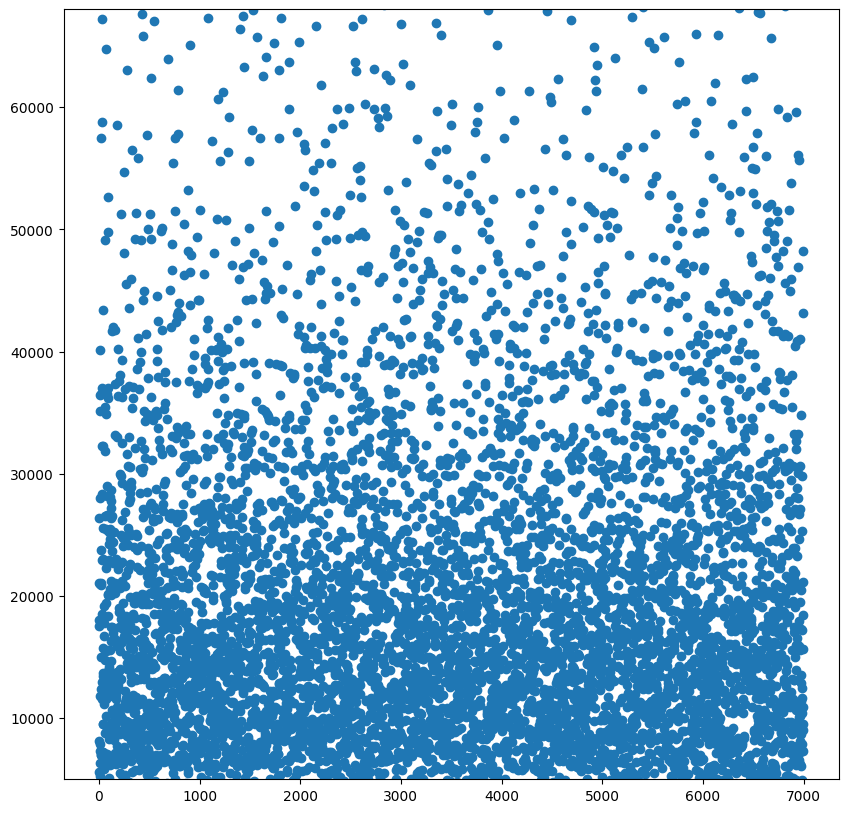

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_ylim(5000, 68000)
ax.scatter(shuffled_posts_data.index, shuffled_posts_data["likes"])

In [ ]:
def assign_like_classes(likes):
  if likes < 50000:
    return 0
  return 1

In [ ]:
shuffled_posts_data["is_popular"] = shuffled_posts_data["likes"].apply(assign_like_classes)

shuffled_posts_data

,description,media,media_alt,likes,comments,media_labels,media_text,final_description,is_popular
0,The letters are stamped all over the hallways ...,https://instagram.fbom22-1.fna.fbcdn.net/v/t51...,"Photo by Bloomberg Business on September 19, 2...",8100,215,"['Skyscraper', 'Building', 'Sky', 'Cloud', 'Da...",The trillion-dollar industry\npowering Chicago...,The letters are stamped all over the hallways ...,0
1,Hitting the federal debt ceiling would be “pot...,https://instagram.fbom22-1.fna.fbcdn.net/v/t51...,NaN,5568,173,"['Forehead', 'Chin', 'Sleeve', 'Dress shirt', ...",rg\nBloo\nJamie Dimon:\nDebt ceiling could\nbe...,Hitting the federal debt ceiling would be “pot...,0
2,There’s a growing body of evidence that “super...,https://instagram.fbom22-1.fna.fbcdn.net/v/t51...,"Photo shared by Bloomberg Business on May 30, ...",17527,328,"['Car', 'Motor vehicle', 'Product', 'Vehicle',...",One infected person\nloud-talking in a crowd\n...,There’s a growing body of evidence that “super...,0
3,"Yeezy, the sneaker company founded by Kanye We...",https://instagram.fbom22-1.fna.fbcdn.net/v/t51...,"Photo by Bloomberg Business on July 07, 2020.",26352,618,"['Cap', 'Human', 'Gesture', 'Font', 'Community...",ZRZU\nKanye West's Yeezy\ngot millions from a\...,"Yeezy, the sneaker company founded by Kanye We...",0
4,"As MacKenzie and Jeff Bezos, the couple's dona...",https://instagram.fbom22-1.fna.fbcdn.net/v/t51...,NaN,294849,294,"['Font', 'Poster', 'Advertising', 'Event', 'Gr...",MACKENZIE SC\neeee\n200\nelee\n:000000000; :00...,"As MacKenzie and Jeff Bezos, the couple's dona...",1
...,...,...,...,...,...,...,...,...,...
6993,Block said it will explore legal action agains...,https://instagram.fbom22-1.fna.fbcdn.net/v/t51...,"Photo by Bloomberg Business on March 23, 2023.",9509,198,"['Forehead', 'Nose', 'Beard', 'Jaw', 'Ear', 'F...",Jack Dorsey's Block vows to\nfight back after ...,Block said it will explore legal action agains...,0
6994,The pandemic dramatically changed property mar...,https://instagram.fbom22-1.fna.fbcdn.net/v/t51...,"Photo by Bloomberg Business on May 07, 2021.",7309,113,"['Product', 'Font', 'Urban design', 'Magenta',...",How the pandemic reshaped\nreal estate across ...,The pandemic dramatically changed property mar...,0
6995,The fallout from the implosion of Silicon Vall...,https://instagram.fbom22-1.fna.fbcdn.net/v/t51...,"Photo by Bloomberg Business on March 14, 2023.",9017,166,"['News', 'Font', 'Publication', 'Newspaper', '...",AAAAAAA\nFW C 381\nDERAL RESERVE NOTE\n700-\n1...,The fallout from the implosion of Silicon Vall...,0
6996,"In the post-pandemic world, the ultimate luxur...",https://instagram.fbom22-1.fna.fbcdn.net/v/t51...,"Photo by Bloomberg Business on June 14, 2020.",15677,91,"['Furniture', 'Property', 'Plant', 'Table', 'W...",Italy's luxury hotels are gradually\nreopening...,"In the post-pandemic world, the ultimate luxur...",0


In [ ]:
shuffled_posts_data["is_popular"].value_counts()

0    6430
1     568
Name: is_popular, dtype: int64

In [ ]:
X = padded_data
y = shuffled_posts_data["is_popular"]

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier =  RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
classifier.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
classifier.score(X_test, y_test)

0.53

In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

np.random.seed(42)

classifier = RandomForestClassifier()
scores=[]
kFold=KFold(n_splits=10)
for train_index, test_index in kFold.split(X):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    classifier.fit(X_train, y_train)
    scores.append(classifier.score(X_test, y_test))
classifier.fit(X_train,y_train)
scores.append(classifier.score(X_test,y_test))
print(np.mean(scores))

cross_val_score(classifier, X, y, cv=10)

0.9191919811233117


array([0.91714286, 0.91857143, 0.91714286, 0.91857143, 0.91857143,
       0.91714286, 0.91714286, 0.91857143, 0.92131617, 0.91988555])

In [ ]:
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.4/143.4 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 47.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 69.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 62.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039181 sha256=1fba43c041fce177a8d20e155598a50df58fe6a7f0

In [ ]:
!pip install bertopic[visualization]

In [ ]:
from bertopic import BERTopic

In [ ]:
model = BERTopic(verbose=True)

#convert to list

topics, probabilities = model.fit_transform(cleaned_description)

Batches:   0%|          | 0/219 [00:00<?, ?it/s]

2023-10-01 17:27:42,424 - BERTopic - Transformed documents to Embeddings
2023-10-01 17:27:59,385 - BERTopic - Reduced dimensionality
2023-10-01 17:27:59,643 - BERTopic - Clustered reduced embeddings


In [ ]:
model.get_topic_freq().head(11)

,Topic,Count
2,-1,2233
10,0,362
33,1,255
31,2,216
78,3,117
21,4,106
5,5,106
28,6,95
6,7,90
13,8,88


In [ ]:
len(model.get_topic_freq())

117

In [ ]:
model.get_topic(6)

[('vaccine', 0.06002741094763762),
 ('pfizer', 0.04043451723369195),
 ('shot', 0.0332776427329343),
 ('covid19', 0.025271465502956003),
 ('shots', 0.024852779056232722),
 ('vaccines', 0.023959085440144443),
 ('covid', 0.020544923883420253),
 ('astrazeneca', 0.019663378066255805),
 ('antibodies', 0.01856934471794814),
 ('glove', 0.017466993287169573)]

In [ ]:
shuffled_posts_data["topic"] = topics

In [ ]:
topic_likes = shuffled_posts_data.groupby('topic')['likes'].mean()
topic_comments = shuffled_posts_data.groupby('topic')['comments'].mean()

In [ ]:
most_likes_topic = topic_likes.idxmax()
most_comments_topic = topic_comments.idxmax()

most_likes_count = topic_likes[most_likes_topic]
most_comments_count = topic_comments[most_comments_topic]

In [ ]:
most_likes_topic, most_likes_count

(94, 83259.2)

In [ ]:
model.get_topic(-1)

[('billion', 0.004600677536358428),
 ('one', 0.004400580349582794),
 ('happy', 0.004332506898312959),
 ('world', 0.004323971484358941),
 ('million', 0.004174805974891922),
 ('full', 0.004162653620947298),
 ('gesture', 0.004153088190622528),
 ('sleeve', 0.004121607307375995),
 ('event', 0.003959860769499347),
 ('wealth', 0.003735511533905212)]

In [ ]:
topic_likes

topic
-1      28272.874160
 0      21134.593923
 1      62349.705882
 2      32810.652778
 3      24409.504274
            ...     
 111    23423.583333
 112    21101.300000
 113    44390.300000
 114    15219.000000
 115    15922.100000
Name: likes, Length: 117, dtype: float64

In [ ]:
topic_labels = model.generate_topic_labels(nr_words=3,
                                                 topic_prefix=False,
                                                 word_length=10,
                                                 separator=", ")

In [ ]:
sorted_topics = topic_likes.sort_values(ascending=False)
top_10_like_topics = sorted_topics.head(11)
bottom_10_like_topics = sorted_topics.tail(10)

In [ ]:
top_10_likes = dict()

for index, score in top_10_like_topics.items():
    if index == -1:
      continue
    topic = topic_labels[index + 1]
    top_10_likes[topic] = score

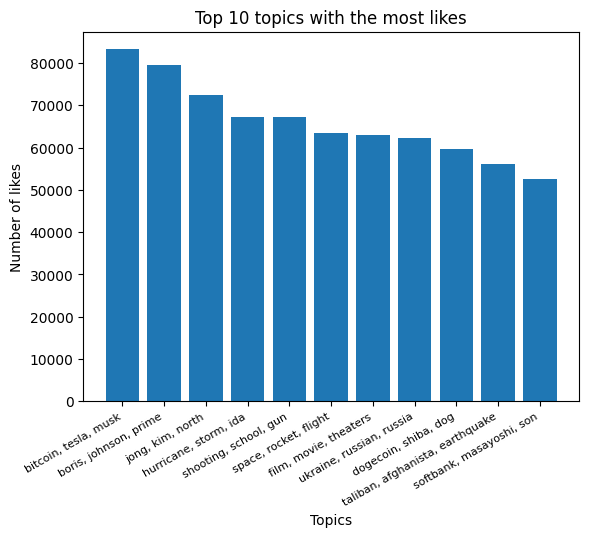

In [ ]:
fig, ax = plt.subplots()
plt.xticks(fontsize=8)
plt.xticks(rotation=30, ha="right")

ax.bar(top_10_likes.keys(), top_10_likes.values())

ax.set_xlabel("Topics")
ax.set_ylabel("Number of likes")
ax.set_title("Top 10 topics with the most average likes");

In [ ]:
bottom_10_likes = dict()

for index, score in bottom_10_like_topics.items():
    if index == -1:
      continue
    topic = topic_labels[index + 1]
    bottom_10_likes[topic] = score

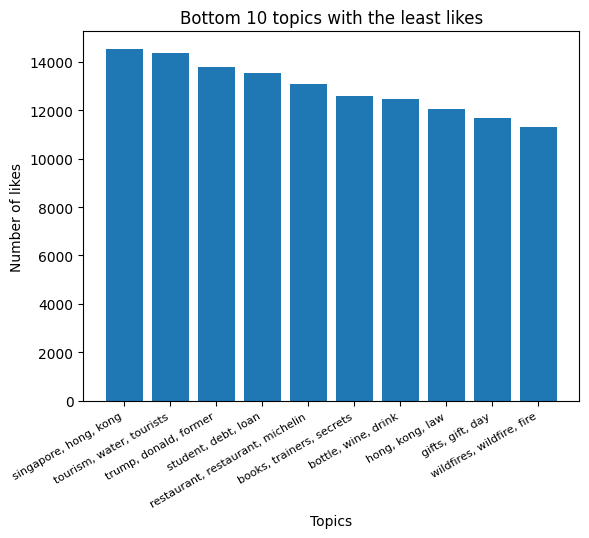

In [ ]:
fig, ax = plt.subplots()
plt.xticks(fontsize=8)
plt.xticks(rotation=30, ha="right")

ax.bar(bottom_10_likes.keys(), bottom_10_likes.values())

ax.set_xlabel("Topics")
ax.set_ylabel("Number of likes")
ax.set_title("Bottom 10 topics with the least average likes");